In [ ]:
import numpy as np
import pandas as pd
import cvxpy as cp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Problema 1

In [ ]:
x = np.array([
    [1, 1.75],
    [1, 1.68],
    [1, 1.82],
    [1, 1.60],
    [1, 1.77],
    [1, 1.69],
    [1, 1.73],
    [1, 1.80],
    [1, 1.66],
    [1, 1.78],
    [1, 1.74],
    [1, 1.65],
    [1, 1.70],
    [1, 1.81],
    [1, 1.67],
    [1, 1.76],
    [1, 1.63],
    [1, 1.79],
    [1, 1.71],
    [1, 1.64]
])


In [ ]:
y = np.array([
    72, 65, 78, 58, 75, 64, 70, 80, 62, 76,
    71, 60, 68, 79, 63, 74, 59, 77, 69, 61
])


Para generar las matrices requeridas, definimos una función donde ingreses las matrices originales y calcule las resultantes, así como los valores propios de ser posible.

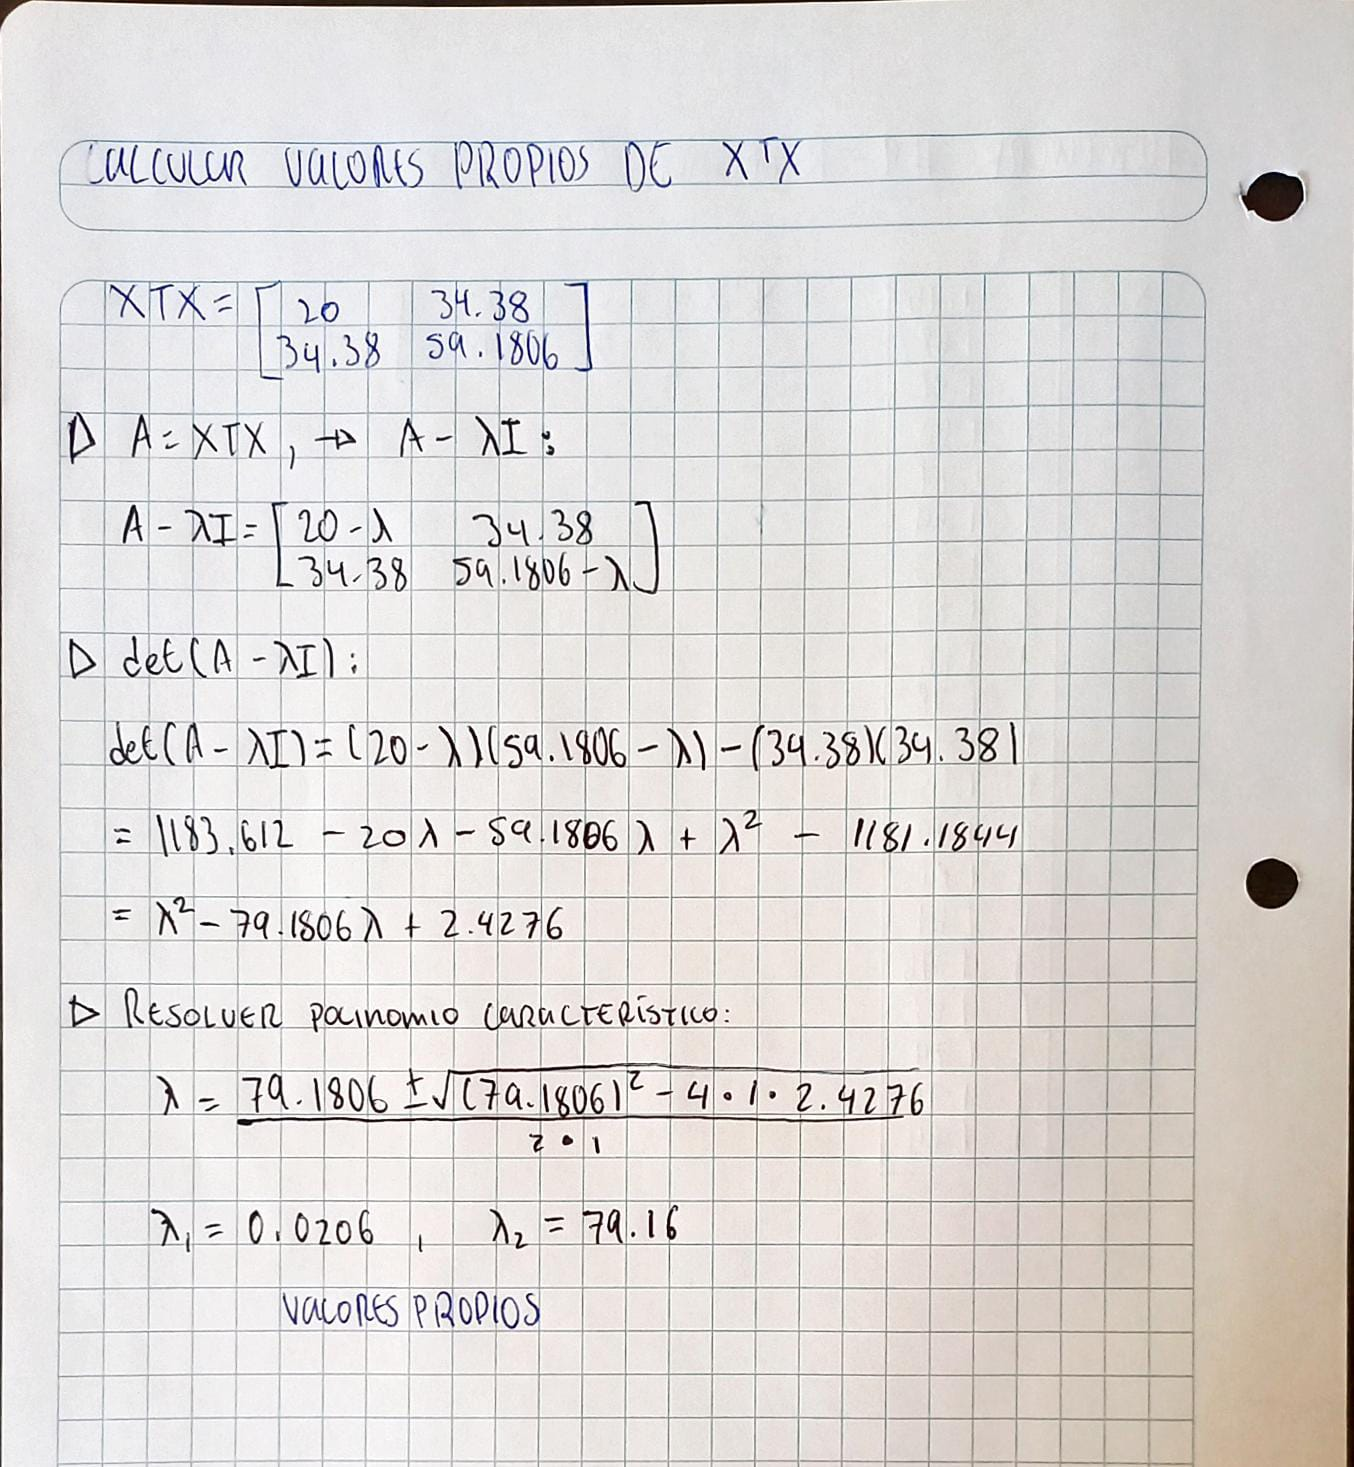

In [ ]:
def lin_reg(x, y):
    #define matrix x and y
    x = np.array(x)
    y = np.array(y)

    #X transpose X
    x_trans = x.T

    # y transpose
    y_trans = y.T

    #x transpose x
    x_trans_x = np.dot(x_trans, x)

    #eigen values
    eigen_v = np.linalg.eigvals(x_trans_x)

    #x transpose x -1
    x_trans_x_inv = np.linalg.inv(x_trans_x)

    #y trnaspose x
    y_trans_x = np.dot(y_trans,x)

    #Estimate for Betas
    betas = np.dot(x_trans_x_inv, y_trans_x)

    return print("EIGEN VALUES: ", eigen_v,  "BETAS: ", betas,
                 "X transpose X: ", x_trans_x)

Revisamos que el modelo funcione con los datos originales del problema.

In [ ]:
lin_reg(x,y)

EIGEN VALUES:  [2.05608792e-02 7.91600391e+01] BETAS:  [-117.69955763  108.63848611] X transpose X:  [[20.     34.38  ]
 [34.38   59.1806]]


Obtuvimos los valores propios, betas y matriz de X transpuerta X, confirmando que los datos generan un modelo de regresión. Ahora, probamos con una matriz X que contenga una columna de escalares.

In [ ]:
A = np.array([
    [1, 1.75, 10],
    [1, 1.68, 10],
    [1, 1.82, 10],
    [1, 1.60, 10],
    [1, 1.77, 10],
    [1, 1.69, 10],
    [1, 1.73, 10],
    [1, 1.80, 10],
    [1, 1.66, 10],
    [1, 1.78, 10],
    [1, 1.74, 10],
    [1, 1.65, 10],
    [1, 1.70, 10],
    [1, 1.81, 10],
    [1, 1.67, 10],
    [1, 1.76, 10],
    [1, 1.63, 10],
    [1, 1.79, 10],
    [1, 1.71, 10],
    [1, 1.64, 10]
])

In [ ]:
A_values = np.linalg.eigvals(np.dot(A.T,A ))
A_values

array([2.07910153e+03, 2.91930453e-16, 7.90666532e-02])

Al calcular los valores propios de la matrz A transpuesta por A, vemos que uno de los valores propios es sumamente cercano a 0, lo cual imposibilita la inversión de la matriz resultante del producto, por ende, añadir una columna con un mismo escalar, hace que el modelo no funcione.

# Problema 2

Considerando el diagrama de dispersión de la figura 1, un modelo lineal de la forma $ \hat{y} = \beta_{0} + \beta_{1}x$ debe ser propuesto para los datos de la altura y peso presentados.

## Por matrices

In [ ]:
lin_reg(x, y)

EIGEN VALUES:  [2.05608792e-02 7.91600391e+01] BETAS:  [-117.69955763  108.63848611] X transpose X:  [[20.     34.38  ]
 [34.38   59.1806]]


## CVXPY

In [ ]:
X = np.array(x)
y = np.array(y)

# Número de características
num_features = X.shape[1]

# Definir variable para coeficientes de regresión
beta = cp.Variable(num_features)

# Define la función de costo (minimización del error cuadrático)
cost = cp.sum_squares(X @ beta - y)

# Resolver el problema
problem = cp.Problem(cp.Minimize(cost))
problem.solve()

# Resultados de los coeficientes
betas = beta.value
betas

array([-117.69955763,  108.63848611])

## Scikit-Learn

In [ ]:
# No es necesaria columna de 1
x1 = np.array([1.7, 1.68, 1.82, 1.60, 1.77, 1.69, 1.73, 1.80, 1.66, 1.78, 1.74, 1.65, 1.70, 1.81, 1.67, 1.76, 1.63, 1.79, 1.71, 1.64])

In [ ]:
# matriz X y vector y
X = np.array(x1)
X = x1.reshape(-1, 1)
# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X, y)

# Coeficientes y término independiente
betas = model.coef_
intercept = model.intercept_

betas, intercept

(array([107.78625008]), -115.96509825801242)

**Ecuación:**

$$
{y} = -117.69 + 108.63x
$$

# Problema 3

Consider the data set presented in Table 2 now. In this case,
consider the possibility of having access to more variables that
can predict a person’s weight, thus making the problem multivariate in the input or a multiple linear regression problem.
For this case, fist, write the appropriate X matrix and Y vector.
Then, calculate the estimate ˆβ in three different ways. The first
is through the direct least squares formula, the second uses
CVXPY, and the third uses Scikit-Learn.

In [ ]:
x = ([
    [1.75, 1.6, 1650],
    [1.68, 1.5, 1500],
    [1.82, 1.8, 1800],
    [1.60, 1.4, 1400],
    [1.77, 1.7, 1700],
    [1.69, 1.6, 1550],
    [1.73, 1.5, 1600],
    [1.80, 1.9, 1850],
    [1.66, 1.5, 1450],
    [1.78, 1.7, 1750],
    [1.74, 1.6, 1650],
    [1.65, 1.4, 1450],
    [1.70, 1.5, 1550],
    [1.81, 1.8, 1800],
    [1.67, 1.5, 1500],
    [1.76, 1.7, 1700],
    [1.63, 1.4, 1400],
    [1.79, 1.8, 1750],
    [1.71, 1.6, 1600],
    [1.64, 1.4, 1450]
])

y=([72, 65, 78, 58, 75, 64, 70, 80, 62, 76, 71, 60, 68, 79, 63, 74, 59, 77, 69, 61])

# Least Squares

In [ ]:
def lin_reg(x, y):
    # Define matrix X and vector y
    X = np.array(x)
    y = np.array(y)

    # X transpose
    X_transpose = X.T

    # X^T * X
    X_transpose_X = np.dot(X_transpose, X)

    # Eigenvalues of X^T * X
    eigenvalues = np.linalg.eigvals(X_transpose_X)

    # Inversa de X^T * X
    X_transpose_X_inv = np.linalg.inv(X_transpose_X)

    # X^T * y
    X_transpose_y = np.dot(X_transpose, y)

    # Estimate for Betas (coefficients)
    betas = np.dot(X_transpose_X_inv, X_transpose_y)

    return eigenvalues, betas, X_transpose_X

eigenvalues, betas, X_transpose_X = lin_reg(x, y)
print("Eigenvalues: ", eigenvalues)
print("Betas (Coefficients): ", betas)
print("X^T * X Matrix: \n", X_transpose_X)

Eigenvalues:  [5.19051103e+07 1.50033997e-01 3.15933611e-02]
Betas (Coefficients):  [-11.05742437  -7.9595675    0.06277885]
X^T * X Matrix: 
 [[5.91806e+01 5.50150e+01 5.53540e+04]
 [5.50150e+01 5.13300e+01 5.16000e+04]
 [5.53540e+04 5.16000e+04 5.19050e+07]]


# CVXPY

In [ ]:
def lin_reg_cvxpy(x, y):
    # Define matrix X and vector y
    X = np.array(x)
    y = np.array(y)

    # Número de características
    num_features = X.shape[1]

    # Definir variable para coeficientes de regresión
    beta = cp.Variable(num_features)

    # Define la función de costo (minimización del error cuadrático)
    cost = cp.sum_squares(X @ beta - y)

    # Resolver el problema
    problem = cp.Problem(cp.Minimize(cost))
    problem.solve()

    # Resultados de los coeficientes
    betas = beta.value
    return betas

betas_cvxpy = lin_reg_cvxpy(x, y)
print("Betas con CVXPY: ", betas_cvxpy)


Betas con CVXPY:  [-11.05742437  -7.9595675    0.06277885]


# Scikit-Learn

In [ ]:
def lin_reg_sklearn(x, y):
    # Define matrix X and vector y
    X = np.array(x)
    y = np.array(y)

    # Crear y entrenar el modelo
    model = LinearRegression(fit_intercept=False)
    model.fit(X, y)

    # Coeficientes y término independiente
    betas = model.coef_

    return betas

betas_sklearn = lin_reg_sklearn(x, y)
print("Betas con Scikit-learn: ", betas_sklearn)

Betas con Scikit-learn:  [-11.05742437  -7.9595675    0.06277885]


### Coeficientes Beta

Los coeficientes obtenidos para el modelo de regresión lineal son los siguientes:
\
**$β$** = \begin{bmatrix} -11.06 \\ -7.96 \\ 0.06 \end{bmatrix}


- **$β1$ = -11.06**
- **$β2$ = -7.96**

- **$β3$ = 0.06**

# Problema 4

## Funciones y datos

In [ ]:
def add_power_column(df, column_name, max_power):
    for power in range(2, max_power + 1):
        new_column_name = f"{column_name}^{power}"
        df[new_column_name] = df[column_name] ** power

def graficar_y(x, betas):
    return sum(betas[i] * x**i for i in range(len(betas)))

def regresion_potencias_ms(X, Y, maxima_potencia, ridge, param_lambda, resultados, grafica, beta_return):
    if ridge == False:
        # Calculos
        power = maxima_potencia + 1
        xtx = X.iloc[:, :power].T.dot(X.iloc[:, :power]).values
        xty = X.iloc[:, :power].T.dot(Y).values
        xtx_inv = np.linalg.inv(xtx)
        betas = xtx_inv.dot(xty)
        det = np.linalg.det(xtx)
        eigenvalues, eigenvectors = np.linalg.eig(xtx)

        if resultados == True:
            # Mostrar Resultados
            print('---INFORME DE RESULTADOS---')
            print('\nBetas')
            print(betas.round(4))
            print('\nMatriz XTX:')
            print(xtx.round(4))
            print('\nMatriz XTX inversa:')
            print(xtx_inv.round(4))
            print('\nDeterminante')
            print(det.round(4))
            print('\nValores propios:')
            print(eigenvalues.round(4))
            print('\nVectores propios:')
            print(eigenvectors.round(4))

        # Graficar Resultados
        if grafica == True:
            x = np.linspace(min(X['Estatura']), max(X['Estatura']), 400)
            y = graficar_y(x, betas)
            # Graficar
            plt.figure(figsize=(10, 6))
            plt.scatter(X['Estatura'], Y, color='skyblue', label='Datos')
            plt.plot(x, y, color="cadetblue", label='Ajuste de Curva')
            plt.xlabel("x")
            plt.ylabel("f(x)")
            plt.title(f"Ajuste del polinomio grado {maxima_potencia}", fontsize=18)
            plt.legend(loc='best')
            plt.grid()
        if beta_return ==True:
            return betas

    elif ridge == True:
        # Calculos
        power = maxima_potencia + 1
        xtx = X.iloc[:, :power].T.dot(X.iloc[:, :power]).values
        xty = X.iloc[:, :power].T.dot(Y).values
        lambda_I = param_lambda * np.identity(len(xtx))
        XTX_li = xtx + lambda_I
        XTX_li_inv = np.linalg.inv(XTX_li)
        betas = (XTX_li_inv).dot(xty)
        det = np.linalg.det(XTX_li)
        eigenvalues, eigenvectors = np.linalg.eig(XTX_li)
        if resultados == True:
            # Mostrar Resultados
            print('---INFORME DE RESULTADOS---')
            print('\nBetas')
            print(betas.round(4))
            print('\nMatriz XTX + LambdaI:')
            print(XTX_li.round(4))
            print('\nMatriz XTX + LambdaI inversa:')
            print(XTX_li_inv.round(4))
            print('\nDeterminante')
            print(det.round(4))
            print('\nValores propios:')
            print(eigenvalues.round(4))
            print('\nVectores propios:')
            print(eigenvectors.round(4))

        # Graficar Resultados
        if grafica == True:
            x = np.linspace(min(X['Estatura']), max(X['Estatura']), 400)
            y = graficar_y(x, betas)
            # Graficar
            plt.figure(figsize=(8, 6))
            plt.scatter(X['Estatura'], Y, color='skyblue', label='Datos')
            plt.plot(x, y, color="cadetblue", label='Ajuste de Curva')
            plt.xlabel("x")
            plt.ylabel("f(x)")
            plt.title(f"Ajuste del polinomio grado {maxima_potencia} con regularización Ridge y lambda {param_lambda}", fontsize=16)
            plt.legend(loc='best')
            plt.grid()
        if beta_return == True:
            return betas

x = np.array([
    [1, 1.75],
    [1, 1.68],
    [1, 1.82],
    [1, 1.60],
    [1, 1.77],
    [1, 1.69],
    [1, 1.73],
    [1, 1.80],
    [1, 1.66],
    [1, 1.78],
    [1, 1.74],
    [1, 1.65],
    [1, 1.70],
    [1, 1.81],
    [1, 1.67],
    [1, 1.76],
    [1, 1.63],
    [1, 1.79],
    [1, 1.71],
    [1, 1.64]
])

Y = np.array([
    72, 65, 78, 58, 75, 64, 70, 80, 62, 76,
    71, 60, 68, 79, 63, 74, 59, 77, 69, 61
])

X = pd.DataFrame(x, columns=['B0', 'Estatura'])
add_power_column(X, 'Estatura', 20)

X.head()

,B0,Estatura,Estatura^2,Estatura^3,Estatura^4,Estatura^5,Estatura^6,Estatura^7,Estatura^8,Estatura^9,...,Estatura^11,Estatura^12,Estatura^13,Estatura^14,Estatura^15,Estatura^16,Estatura^17,Estatura^18,Estatura^19,Estatura^20
0,1.0,1.75,3.0625,5.359375,9.378906,16.413086,28.722900,50.265076,87.963882,153.936794,...,471.431432,825.005007,1443.758762,2526.577833,4421.511209,7737.644615,13540.878076,23696.536634,41468.939109,72570.643440
1,1.0,1.68,2.8224,4.741632,7.965942,13.382782,22.483074,37.771564,63.456228,106.606463,...,300.886082,505.488618,849.220877,1426.691074,2396.841005,4026.692888,6764.844051,11364.938006,19093.095850,32076.401029
2,1.0,1.82,3.3124,6.028568,10.971994,19.969029,36.343632,66.145410,120.384647,219.100058,...,725.747031,1320.859596,2403.964466,4375.215327,7962.891896,14492.463250,26376.283115,48004.835269,87368.800190,159011.216347
3,1.0,1.60,2.5600,4.096000,6.553600,10.485760,16.777216,26.843546,42.949673,68.719477,...,175.921860,281.474977,450.359963,720.575940,1152.921505,1844.674407,2951.479052,4722.366483,7555.786373,12089.258196
4,1.0,1.77,3.1329,5.545233,9.815062,17.372660,30.749609,54.426808,96.335450,170.513747,...,534.202517,945.538455,1673.603066,2962.277426,5243.231044,9280.518948,16426.518539,29074.937813,51462.639929,91088.872675


## Regresión por Mínimos Cuadrados (sin regularización)

#### Polinomio de grado 1

In [ ]:
regresion_potencias_ms(X, Y, 1, False, 0, True, False, False)

---INFORME DE RESULTADOS---

Betas
[-117.6996  108.6385]

Matriz XTX:
[[20.     34.38  ]
 [34.38   59.1806]]

Matriz XTX inversa:
[[ 36.3607 -21.1231]
 [-21.1231  12.288 ]]

Determinante
1.6276

Valores propios:
[2.060e-02 7.916e+01]

Vectores propios:
[[-0.8646 -0.5025]
 [ 0.5025 -0.8646]]


#### Polinomio de grado 2

In [ ]:
regresion_potencias_ms(X, Y, 2, False, 0, True, False, False)

---INFORME DE RESULTADOS---

Betas
[ 13.4054 -44.374   44.5833]

Matriz XTX:
[[ 20.      34.38    59.1806]
 [ 34.38    59.1806 102.0108]
 [ 59.1806 102.0108 176.076 ]]

Matriz XTX inversa:
[[ 31189.2213 -36379.5899  10593.7904]
 [-36379.5899  42446.2115 -12364.0003]
 [ 10593.7904 -12364.0003   3602.5069]]

Determinante
0.0005

Valores propios:
[2.551198e+02 1.368000e-01 0.000000e+00]

Vectores propios:
[[-0.2795 -0.7198  0.6354]
 [-0.4815 -0.4675 -0.7413]
 [-0.8307  0.5132  0.2159]]


#### Polinomio de grado 3

In [ ]:
regresion_potencias_ms(X, Y, 3, False, 0, True, False, False)

---INFORME DE RESULTADOS---

Betas
[ 12514.1964 -21993.5826  12879.875   -2499.7589]

Matriz XTX:
[[ 20.      34.38    59.1806 102.0108]
 [ 34.38    59.1806 102.0108 176.076 ]
 [ 59.1806 102.0108 176.076  304.3238]
 [102.0108 176.076  304.3238 526.679 ]]

Matriz XTX inversa:
[[ 22449516.3348 -39399051.9729  23028798.5727  -4482949.3628]
 [-39399051.9708  69156433.5847 -40428316.9415   7871277.1999]
 [ 23028798.5702 -40428316.9393  23637736.698   -4602905.7355]
 [ -4482949.3621   7871277.199   -4602905.7352    896446.6833]]

Determinante
0.0

Valores propios:
[7.813581e+02 5.774000e-01 1.000000e-04 0.000000e+00]

Vectores propios:
[[ 0.1593 -0.5504 -0.6916  0.4396]
 [ 0.2748 -0.5729  0.0287 -0.7717]
 [ 0.4746 -0.3464  0.6717  0.4511]
 [ 0.8209  0.4988 -0.2638 -0.0878]]


### Conclusión

Se puede observar que las betas del modelo aumentan cada que la potencia del polinomio aumenta. Incluso, en el modelo que la regresión se rompió fue en el polinomio de grado 2, dado que ya teníamos un determinante igual a cero y valores propios iguales a cero.

El crecimiento descontrolado de las betas así como tambien el de la matriz inversa representa que el modelo esta sobreajustándose. Esto se debe a que al elevar datos al cuadrado, al cubo, a la cuarta, etc. los datos del modelo crecen mucho y el modelo tiene que ajustarse de forma correspondiente, lo que tiende a llevar que los coeficientes crezcan descontroladamente y que la matriz $X^TX$ pierda su invertibilidad.

## Añadiendo regularización RIDGE al modelo de regresión

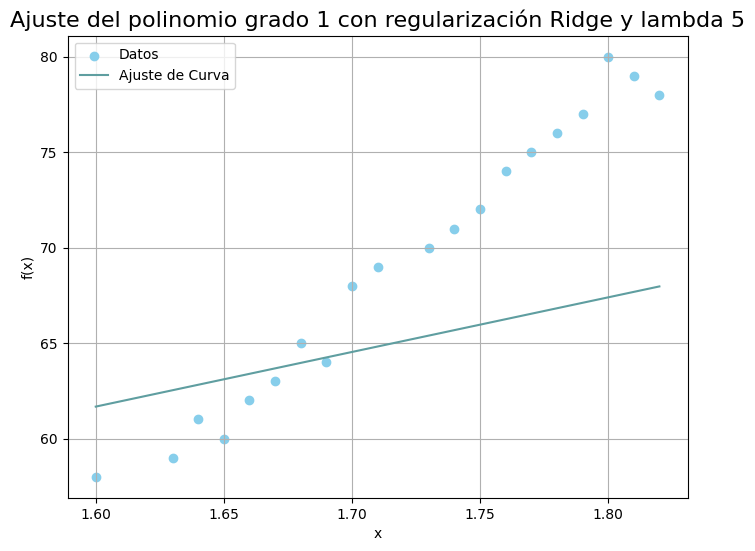

In [ ]:
regresion_potencias_ms(X, Y, 1, True, 5, False, True, False)

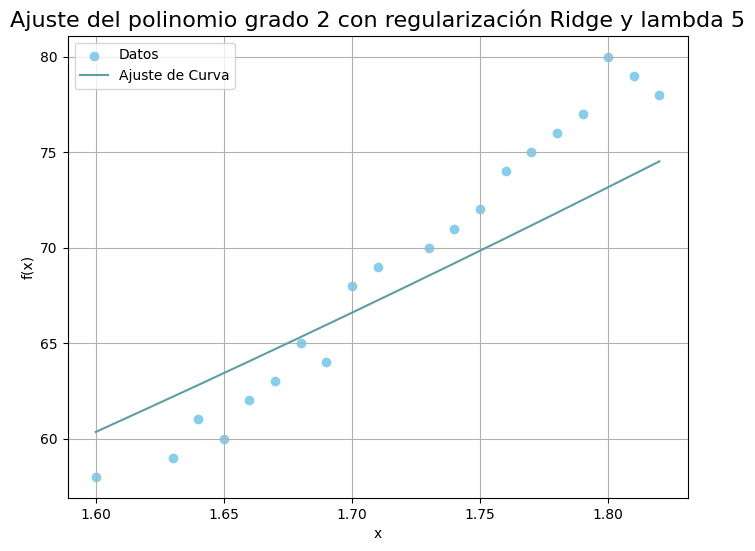

In [ ]:
regresion_potencias_ms(X, Y, 2, True, 5, False, True, False)

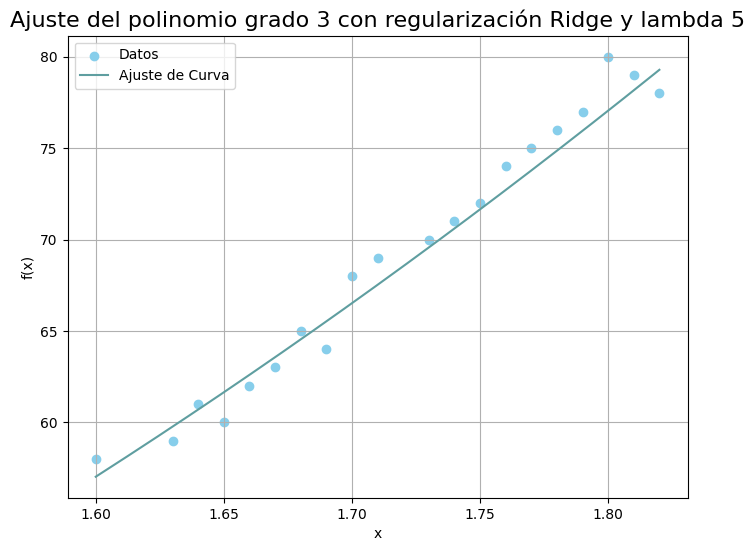

In [ ]:
regresion_potencias_ms(X, Y, 3, True, 5, False, True, False)

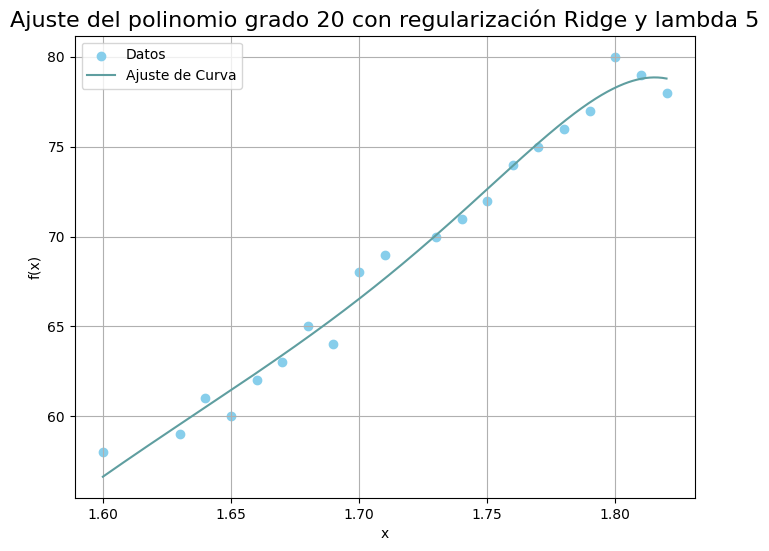

In [ ]:
regresion_potencias_ms(X, Y, len(Y), True, 5, False, True, False)

Como se puede ver, aun formulando un modelo de grado 20 (que es el número total de datos que se tienen) el modelo se mantiene estable.

**Motivos de uso de los valores propios de una matriz y explicación de esta técnica:**

La matriz $X^TX$ suele convertirse en no invertible si contiene características que sean combinaciones lineales de otras. Por otro lado, una matriz que no es invertible tiene valores propios iguales a 0. Para evitar que suceda esto, se propone modificar $X^TX$ de tal manera que si tenga una pueda ser invertible e igualmente pueda estimar los parámetros del modelo correctamente, evitando así el problema de crecimiento en los coeficientes.

Una matriz cuadrada $A$ puede descomponerse de la forma $A=M^{-1}\Lambda M$ en donde $M$ es una matriz ortogonal de vectores propios y $\Lambda$ una matriz diagonal de valores propios $\lambda_1, \lambda_2, ..., \lambda_n$. Esto lleva a que la matriz "regularizada" $X^TX + \lambda I$ tenga valores propios $\lambda + \Lambda_i$, lo que significa que ahora tiene valores propios diferentes de cero, y por lo tanto, la matriz ahora es invertible evitando el problema de crecimiento en los coeficientes.

# Problema 5

In [ ]:
x = np.array([
    [1, 1.75],    [1, 1.68],
    [1, 1.82],    [1, 1.60],
    [1, 1.77],    [1, 1.69],
    [1, 1.73],    [1, 1.80],
    [1, 1.66],    [1, 1.78],
    [1, 1.74],    [1, 1.65],
    [1, 1.70],    [1, 1.81],
    [1, 1.67],    [1, 1.76],
    [1, 1.63],    [1, 1.79],
    [1, 1.71],    [1, 1.64]
])

In [ ]:
x_avg = np.array([
    [1, 1.75, 1.72],
    [1, 1.68, 1.72],
    [1, 1.82, 1.72],
    [1, 1.60, 1.72],
    [1, 1.77, 1.72],
    [1, 1.69, 1.72],
    [1, 1.73, 1.72],
    [1, 1.80, 1.72],
    [1, 1.66, 1.72],
    [1, 1.78, 1.72],
    [1, 1.74, 1.72],
    [1, 1.65, 1.72],
    [1, 1.70, 1.72],
    [1, 1.81, 1.72],
    [1, 1.67, 1.72],
    [1, 1.76, 1.72],
    [1, 1.63, 1.72],
    [1, 1.79, 1.72],
    [1, 1.71, 1.72],
    [1, 1.64, 1.72]
])


In [ ]:
x_bmi = np.array([
    [1, 1.75, 23.51],
    [1, 1.68, 23.03],
    [1, 1.82, 23.55],
    [1, 1.60, 22.66],
    [1, 1.77, 23.94],
    [1, 1.69, 22.40],
    [1, 1.73, 23.39],
    [1, 1.80, 24.69],
    [1, 1.66, 22.50],
    [1, 1.78, 23.99],
    [1, 1.74, 23.45],
    [1, 1.65, 22.04],
    [1, 1.70, 23.53],
    [1, 1.81, 24.10],
    [1, 1.67, 22.61],
    [1, 1.76, 23.89],
    [1, 1.63, 22.21],
    [1, 1.79, 24.03],
    [1, 1.71, 23.59],
    [1, 1.64, 22.70]
])


In [ ]:
def val_propios(matrix):
  v_propios = np.linalg.eigvals(np.dot(matrix.T, matrix))
  return v_propios

In [ ]:
val_propios(x)

array([2.05608792e-02, 7.91600391e+01])

In [ ]:
val_propios(x_avg)

array([ 1.38302016e+02, -1.45084052e-15,  4.65842222e-02])

In [ ]:
val_propios(x_bmi)

array([1.09382453e+04, 1.74051081e-02, 2.12229137e-02])

Al analizar los valores propios de los tres conjuntos de datos, vemos que aquel que contiene la altura promedio del grupo tiene un valor propio muy acercado a cero, por lo que muy probablemente exista una inflación en los parámetros de las betas al hacer el modelo de regresión.

In [ ]:
lin_reg(x,y)

EIGEN VALUES:  [2.05608792e-02 7.91600391e+01] BETAS:  [-117.69955763  108.63848611] X transpose X:  [[20.     34.38  ]
 [34.38   59.1806]]


In [ ]:
lin_reg(x_avg,y)

EIGEN VALUES:  [ 1.38302016e+02 -1.45084052e-15  4.65842222e-02] BETAS:  [ 254.175625    108.63848611 -191.68145349] X transpose X:  [[20.     34.38   34.4   ]
 [34.38   59.1806 59.1336]
 [34.4    59.1336 59.168 ]]


In [ ]:
lin_reg(x_bmi, y)

EIGEN VALUES:  [1.09382453e+04 1.74051081e-02 2.12229137e-02] BETAS:  [-137.2431793    79.8800493     2.96169574] X transpose X:  [[   20.        34.38     465.81  ]
 [   34.38      59.1806   801.5176]
 [  465.81     801.5176 10859.1033]]


Si analizamos, modelo por modelo, los resultados de la regresión, vemos que el modelo original tiene parámetros relativamente sencillos, y cuadran los valores propios del producto de la matriz y su transpuesta.

El segundo modelo, que incluye la altura promedio como variable predictora, tiene valores propios muy cercanos a cero, y los coeficientes de las betas se inflaron al calcular el modelo, por lo que esto nos ayuda a descartar esta opción como un modelo factible. Además de que sabemos que incluir variables planas en un conjunto de datos para una regresión lineal no aporta información al modelo, y puede causar problemas en la computación del mismo.

Finalmente, el modelo que incluye el índice de masa corporal también parece obtener coeficientes funcionales, sus valores propios no son extremadamente raros, por lo que a un primer análisis, parece un buen modelo. Sin embargo, si analizamos cómo funcionan los conjuntos de datos, sabemos que el índice de masa corporal depende de la altura de la persona, por lo que nos encontramos un problema de filtración de datos, en el que la variable predictora depende de la variable a predecir. Esto signfica que es probable que el modelo se sobreajuste a los datos de entrenamiento del modelo pero no sea capaz de predecir corerctamente datos nuevos, por la filtración.

En conclusión, debido a la filtración de datos del conjunto con el índice de masa corporal, y la variable plana en la forma de la altura promedio, podemos decir que es mejor evitar los datos con este tipo de características, ya que influyen negativamente al modelo, y es mejor mantenerlo más simple, que añadir datos que perjudiquen la predicción.











---